# Iterative prediction with simply lagged data

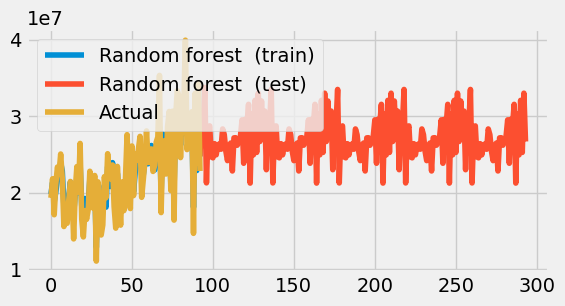

In [59]:
from timeseries_basic import createTimeSeriesDf, insertLags, prepareTrainData, trainAndFit, plotPredAndTest, makeNextTest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import pandas as pd
# prepare data
df = createTimeSeriesDf('C:/Users/janyl/safemed_2.xlsx', make_date_buckets=True)
colsSelected = insertLags(df)
X_train = df[colsSelected].to_numpy()
y_train = df["Sales"].to_numpy()
actualSales = y_train

nextRow = makeNextTest(df, colsSelected)
X_test = nextRow.to_numpy()

modelRf = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
fitRf, predRf = trainAndFit(modelRf, X_train, X_test, y_train, None, "Random forest")
nextRow.insert(0,'Sales', modelRf.predict(X_test))
nextRow.insert(1, 'quarter', nextRow.index.quarter)
nextRow.insert(2, 'month', nextRow.index.month)

dfNext = pd.DataFrame(nextRow)

for i in range(200):
    nextRow = makeNextTest(nextRow, colsSelected)
    X_test = nextRow.to_numpy()
    nextRow.insert(0,'Sales', modelRf.predict(X_test))
    nextRow.insert(1, 'quarter', nextRow.index.quarter)
    nextRow.insert(2, 'month', nextRow.index.month)
    dfNext = pd.concat([dfNext, nextRow])

predRf = dfNext["Sales"].to_numpy()
plt.figure()
plotPredAndTest(fitRf, predRf, actualSales, label= "Random forest ")


While 200 iterations is unreasonable, the above graph does show sesonability of data

In [60]:
dfNext

,Sales,quarter,month,Sales_lag_1,Sales_lag_2,Sales_lag_3
Date,,,,,,
2022-01-01,3.025976e+07,1,1,2.283297e+07,3.436941e+07,2.390565e+07
2022-02-01,2.882860e+07,1,2,3.025976e+07,2.283297e+07,3.436941e+07
2022-03-01,3.375120e+07,1,3,2.882860e+07,3.025976e+07,2.283297e+07
2022-04-01,2.127955e+07,2,4,3.375120e+07,2.882860e+07,3.025976e+07
2022-05-01,2.816134e+07,2,5,2.127955e+07,3.375120e+07,2.882860e+07
...,...,...,...,...,...,...
2038-05-01,2.494078e+07,2,5,3.029700e+07,2.124880e+07,3.154214e+07
2038-06-01,3.206257e+07,2,6,2.494078e+07,3.029700e+07,2.124880e+07
2038-07-01,2.525669e+07,3,7,3.206257e+07,2.494078e+07,3.029700e+07


In [61]:
df


,Sales,quarter,month,Sales_lag_1,Sales_lag_2,Sales_lag_3
Date,,,,,,
2014-04-01,19323056.76,2,4,21026006.52,19325573.70,20375147.15
2014-05-01,21812402.79,2,5,19323056.76,21026006.52,19325573.70
2014-06-01,17112150.55,2,6,21812402.79,19323056.76,21026006.52
2014-07-01,21100263.32,3,7,17112150.55,21812402.79,19323056.76
2014-08-01,23348085.73,3,8,21100263.32,17112150.55,21812402.79
...,...,...,...,...,...,...
2021-08-01,14678815.32,3,8,30578010.06,27635966.69,27122135.03
2021-09-01,32975860.80,3,9,14678815.32,30578010.06,27635966.69
2021-10-01,23905648.49,4,10,32975860.80,14678815.32,30578010.06
